# Clustering Customer Segmentation

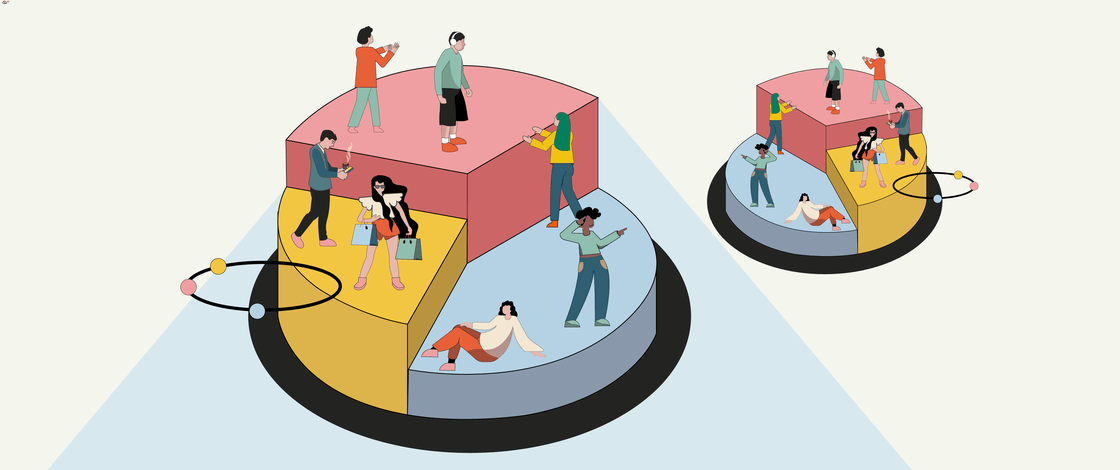

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a
business to better understand its customers and makes it easier for them to modify products
according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers
from different types of customer segments.

Importing libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA #for dimensionality reduction (PCA)

import warnings
warnings.filterwarnings('ignore')

Loading data

In [120]:
customer_data = pd.read_excel('D:\Data Science\Project\marketing_campaign.xlsx')

customer_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# Features:¶
 
# **People**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
# **Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
# **Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
# **Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [121]:
customer_data.shape

(2240, 29)

In [122]:
customer_data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [123]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Data Cleaning

In this section, we will deal with the following:

Identify the key variables that we will use for clustering from the original dataset
Missing values - Excluded 24 customers with missing values
Outliers - Excluded 1 customer with >600k annual income
Categorical Variables - Let's assess the categorical variables and decide if we want to group them differently
Feature Engineering

In [124]:
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 customers for which we have no income listed.  We could try to predict these customers incomes based on their other attributes, however, they're only 24 customers out of 2k+ customers and we don't necessarily need 100% of customers in order to develop a useful customer segmentation model.

As such, we will be removing these customers from our analysis.

In [125]:
data = customer_data.dropna()

In [126]:
data.shape

(2216, 29)

There were 2,240 customers in our database, we removed 24 due to missing values, and are now left with 2,216 remaining customers.

In [127]:
data['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [128]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [129]:
data['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

# Categorical Variables Assessment

We will assess the following categorical variables:

Education
Marital Status

For each of the above, I will assess them and determine whether they should be grouped in a more meaningful manner

In [130]:
education_counts = data['Education'].value_counts()
marstatus_counts = data['Marital_Status'].value_counts()

print(education_counts)
print(marstatus_counts)

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


# Feature Engineering

In [131]:
#Cust_Age = today-Year_Birth
data['Cust_Age']= 2023 - data['Year_Birth']

#Total_Sales = MntWines+ MntWines + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
data['spent']=data['MntWines']+data['MntFruits']+ \
                            data['MntMeatProducts']+data['MntFishProducts']+ \
                            data['MntSweetProducts']+data['MntGoldProds']

#Total_Purchases = NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
data['Total_Purchases']=data['NumDealsPurchases']+data['NumWebPurchases']+ \
                            data['NumCatalogPurchases']+data['NumStorePurchases']

#Avg_Purchase = Total_Sales/Total_Purchases
data['Avg_Purchase']=data['spent']/data['Total_Purchases']

#Deal_Share = NumDealsPurchases/Total_Purchases
data['Deal_Share']=data['NumDealsPurchases']/data['Total_Purchases']

#Web_Share = NumWebPurchases/Total_Purchases
data['Web_Share']=data['NumWebPurchases']/data['Total_Purchases']

#Catalog_Share = NumCatalogPurchases/Total_Purchases
data['Catalog_Share']=data['NumCatalogPurchases']/data['Total_Purchases']

#Store_Share = NumStorePurchases/Total_Purchases
data['Store_Share']=data['NumStorePurchases']/data['Total_Purchases']

data['Num_Accepted_Cmp'] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"]

# Number of companies in which the client accepted the offer


# replace varied education fit to group ['Undergraduate','Graduate','Postgraduate']
data["education"] = data['Education'].replace({"Basic":"Undergraduate",
                                      "2n Cycle":"Undergraduate", 
                                      "Graduation":"Graduate", 
                                      "Master":"Postgraduate", 
                                      "PhD":"Postgraduate"
                                     })

data["married status"] = data["Marital_Status"].replace({"Married":"Partner", 
                                                "Together":"Partner", 
                                                "Absurd":"Alone", 
                                                "Widow":"Alone", 
                                                "YOLO":"Alone", 
                                                "Divorced":"Alone", 
                                                "Single":"Alone"
                                               })
# children in household
children_ = data['Kidhome'] + data['Teenhome']

# Parent ?
is_parent = np.where(children_ > 0, 1, 0) # return true element





data.head(15)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
11   387        1976       Basic        Married   7500.0        0         0   
12  2125        1959  Graduation       Divorced  63033.0        0         0   
13  8180        1952      Master       Divorced  59354.0        1         1   
14  2569        1987  Graduation        Married  17323.0        0         0   
15  2114        1946         PhD         Single  82800.0        0         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0   2012-09-04       58       635         88              546   
1   2014-03-08       38        11          1                6   
2   2013-08-21       26       426         49              127   
3   2014-02-10       26        11          4               20   
4   2014-01-19       94       173         43              118   
5   2013-09-09       16       520         42               98   
6   2012-11-13       34       235         65              164   
7   2013-05-08       32        76         10               56   
8   2013-06-06       19        14          0               24   
9   2014-03-13       68        28          0                6   
11  2012-11-13       59         6         16               11   
12  2013-11-15       82       194         61              480   
13  2013-11-15       53       233          2               53   
14  2012-10-10       38         3         14               17   
15  2012-11-24       23      1006         22              115   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172                88            88                  3   
1                 2                 1             6                  2   
2               111                21            42                  1   
3                10                 3             5                  2   
4                46                27            15                  5   
5                 0                42            14                  2   
6                50                49            27                  4   
7                 3                 1            23                  2   
8                 3                 3             2                  1   
9                 1                 1            13                  1   
11               11                 1            16                  1   
12              225               112            30                  1   
13                3                 5            14                  3   
14                6                 1             5                  1   
15               59                68            45                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                 8                   10                  4   
1                 1                    1                  2   
2                 8                    2                 10   
3                 2                    0                  4   
4                 5                    3                  6   
5                 6                    4                 10   
6                 7                    3                  7   
7          

In [132]:
data.drop(["Marital_Status","Education"], axis = 1, inplace = True)

In [133]:
data

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0      5524        1957  58138.0        0         0  2012-09-04       58   
1      2174        1954  46344.0        1         1  2014-03-08       38   
2      4141        1965  71613.0        0         0  2013-08-21       26   
3      6182        1984  26646.0        1         0  2014-02-10       26   
4      5324        1981  58293.0        1         0  2014-01-19       94   
...     ...         ...      ...      ...       ...         ...      ...   
2235  10870        1967  61223.0        0         1  2013-06-13       46   
2236   4001        1946  64014.0        2         1  2014-06-10       56   
2237   7270        1981  56981.0        0         0  2014-01-25       91   
2238   8235        1956  69245.0        0         1  2014-01-24        8   
2239   9405        1954  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0    

In [134]:
# change confuse name to be obvious name like product name ...
data = data.rename(columns={
    "MntWines": "Wines",
    "MntFruits":"Fruits",
    "MntMeatProducts":"Meat",
    "MntFishProducts":"Fish",
    "MntSweetProducts":"Sweets",
    "MntGoldProds":"Gold"
})

# Outliers

Let's take a look at each of the columns with major outliers on a one by one basis

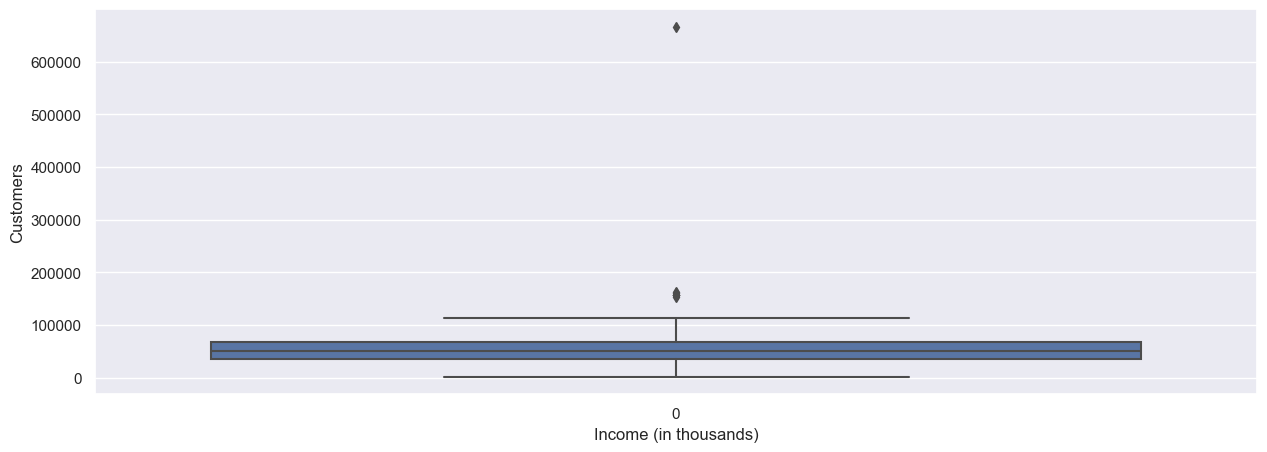

Number of customers where income is greater than 120k: 8


In [135]:
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(data['Income'])

# Set labels for the x-axis and y-axis
plt.xlabel('Income (in thousands)')
plt.ylabel('Customers')

# Display the plot
plt.show()

#let's count the number of $200k+ customers
outlier_incomes =(data['Income']>120000).sum()
# Print the result
print('Number of customers where income is greater than 120k:', outlier_incomes)

<Axes: >

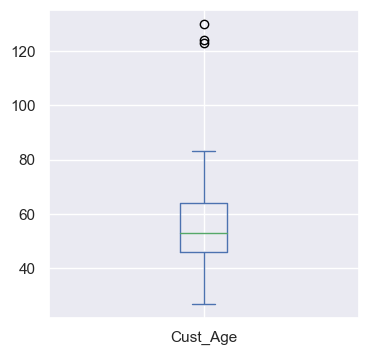

In [136]:
data.loc[:, ['Cust_Age']].plot.box(figsize=(4,4))

There are 4 outliers in age and 8 in income. 

In [137]:
#removing outliers
data = data[(data['Cust_Age'] < 90)]
data = data[data['Income'] < 120000]

# Correlation
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation
When the coefficient is close to –1, it means that there is a strong negative correlation

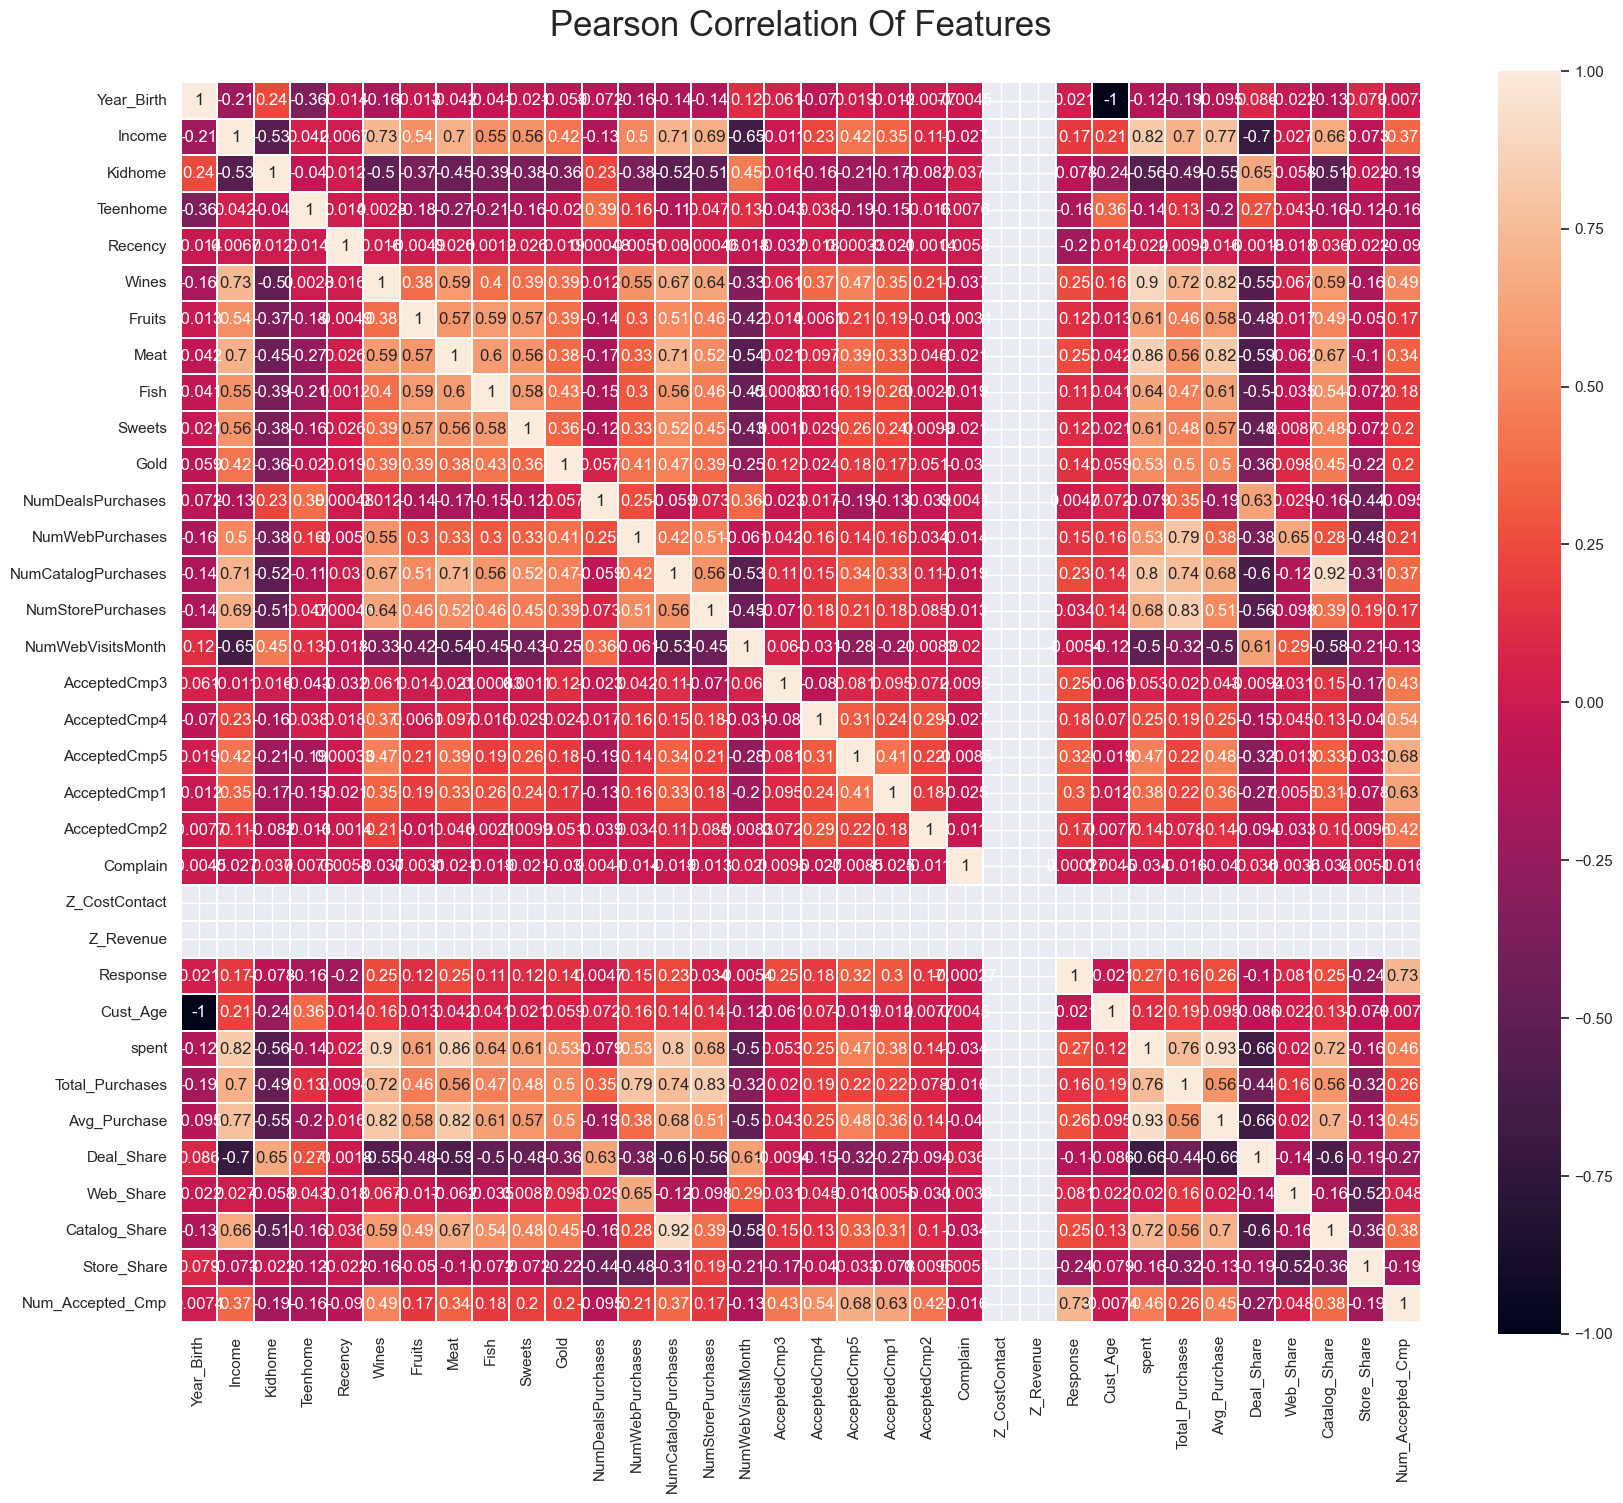

In [138]:
plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop(columns="ID").corr(), square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [139]:
corrmat = data.corr()
corrmat

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.007344  0.001633  0.002030 -0.003292   
Year_Birth           0.007344    1.000000 -0.212625  0.238083 -0.362919   
Income               0.001633   -0.212625  1.000000 -0.531699  0.042483   
Kidhome              0.002030    0.238083 -0.531699  1.000000 -0.040207   
Teenhome            -0.003292   -0.362919  0.042483 -0.040207  1.000000   
Recency             -0.046991   -0.014228  0.006716  0.011829  0.013881   
Wines               -0.018822   -0.164438  0.730495 -0.499288  0.002783   
Fruits               0.010178   -0.013149  0.537920 -0.374388 -0.176925   
Meat                -0.001817   -0.041540  0.702500 -0.445665 -0.267177   
Fish                -0.022333   -0.040855  0.551758 -0.389895 -0.206371   
Sweets              -0.004428   -0.021075  0.555601 -0.379101 -0.164246   
Gold                -0.008056   -0.059295  0.417653 -0.356550 -0.019619   
NumDealsPurchases   -0.040591   -0.072005 -0.132427  0.226434  0.394341   
NumWebPurchases     -0.017433   -0.161839  0.503184 -0.375590  0.161229   
NumCatalogPurchases  0.002944   -0.140724  0.710057 -0.519813 -0.114019   
NumStorePurchases   -0.011595   -0.138614  0.687206 -0.506543  0.047321   
NumWebVisitsMonth   -0.008582    0.122713 -0.648306  0.448497  0.129365   
AcceptedCmp3        -0.035753    0.061405 -0.011181  0.015897 -0.043223   
AcceptedCmp4        -0.023757   -0.069903  0.233267 -0.162597  0.037860   
AcceptedCmp5        -0.004473    0.019275  0.416386 -0.205124 -0.190760   
AcceptedCmp1        -0.018042   -0.011747  0.345242 -0.174741 -0.145748   
AcceptedCmp2        -0.014934   -0.007737  0.110210 -0.082124 -0.015805   
Complain             0.031882   -0.004531 -0.027488  0.037025  0.007633   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021187    0.021305  0.174902 -0.078409 -0.155196   
Cust_Age            -0.007344   -1.000000  0.212625 -0.238083  0.362919   
spent               -0.013573   -0.118404  0.823770 -0.558234 -0.138565   
Total_Purchases     -0.020174   -0.186733  0.701568 -0.485597  0.133866   
Avg_Purchase        -0.013965   -0.095054  0.773390 -0.545042 -0.195888   
Deal_Share          -0.007907    0.085525 -0.697643  0.651671  0.271761   
Web_Share           -0.006771   -0.021761  0.027472 -0.057905  0.043101   
Catalog_Share       -0.004342   -0.133057  0.664706 -0.511163 -0.164710   
Store_Share          0.017741    0.079270 -0.072976 -0.021960 -0.116896   
Num_Accepted_Cmp    -0.034118    0.007371  0.365540 -0.192813 -0.161300   

                      Recency     Wines    Fruits      Meat      Fish  \
ID                  -0.046991 -0.018822  0.010178 -0.001817 -0.022333   
Year_Birth          -0.014228 -0.164438 -0.013149 -0.041540 -0.040855   
Income               0.006716  0.730495  0.537920  0.702500  0.551758   
Kidhome              0.011829 -0.499288 -0.374388 -0.445665 -0.389895   
Teenhome             0.013881  0.002783 -0.176925 -0.267177 -0.206371   
Recency              1.000000  0.016470 -0.004909  0.026138  0.001177   
Wines                0.016470  1.000000  0.384947  0.593119  0.395967   
Fruits              -0.004909  0.384947  1.000000  0.568100  0.592556   
Meat                 0.026138  0.593119  0.568100  1.000000  0.595673   
Fish                 0.001177  0.395967  0.592556  0.595673  1.000000   
Sweets               0.025535  0.388613  0.570986  0.556511  0.582974   
Gold                 0.018558  0.390194  0.392596  0.375581  0.425420   
NumDealsPurchases    0.000479  0.011858 -0.136350 -0.165522 -0.145030   
NumWebPurchases     -0.005104  0.552342  0.300813  0.329453  0.297776   
NumCatalogPurchases  0.029750  0.673234  0.513686  0.714382  0.563174   
NumStorePurchases    0.000462  0.639373  0.459056  0.517245  0.456896   
NumWebVisitsMonth   -0.017906 -0.329395 -0.424463 -0.543387 -0.453353   
AcceptedCmp3

The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”)

In [140]:
#identified the features we want
exclude_features = ['Year_Birth','ID','Dt_Customer','NumDealsPurchases','NumWebPurchases',
               'NumCatalogPurchases','NumStorePurchases','Total_Purchases', 'Z_CostContact','Z_Revenue' ] 

cust_data = data.drop(columns=exclude_features)

cust_data.head(15)

Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  Sweets  \
0   58138.0        0         0       58    635      88   546   172      88   
1   46344.0        1         1       38     11       1     6     2       1   
2   71613.0        0         0       26    426      49   127   111      21   
3   26646.0        1         0       26     11       4    20    10       3   
4   58293.0        1         0       94    173      43   118    46      27   
5   62513.0        0         1       16    520      42    98     0      42   
6   55635.0        0         1       34    235      65   164    50      49   
7   33454.0        1         0       32     76      10    56     3       1   
8   30351.0        1         0       19     14       0    24     3       3   
9    5648.0        1         1       68     28       0     6     1       1   
11   7500.0        0         0       59      6      16    11    11       1   
12  63033.0        0         0       82    194      61   480   225     112   
13  59354.0        1         1       53    233       2    53     3       5   
14  17323.0        0         0       38      3      14    17     6       1   
15  82800.0        0         0       23   1006      22   115    59      68   

    Gold  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     88                  7             0             0             0   
1      6                  5             0             0             0   
2     42                  4             0             0             0   
3      5                  6             0             0             0   
4     15                  5             0             0             0   
5     14                  6             0             0             0   
6     27                  6             0             0             0   
7     23                  8             0             0             0   
8      2                  9             0             0             0   
9     13                 20             1             0             0   
11    16                  8             0             0             0   
12    30                  2             0             0             0   
13    14                  6             0             0             0   
14     5                  8             0             0             0   
15    45                  3             0             0             1   

    AcceptedCmp1  AcceptedCmp2  Complain  Response  Cust_Age  spent  \
0              0             0         0         1        66   1617   
1              0             0         0         0        69     27   
2              0             0         0         0        58    776   
3              0             0         0         0        39     53   
4              0             0         0         0        42    422   
5              0             0         0         0        56    716   
6              0             0         0         0        52    590   
7              0             0         0         0        38    169   
8              0             0         0         1        49     46   
9              0             0         0         0        73     49   
11             0             0         0         0        47     61   
12             0             0         0         0        64   1102   
13             0             0         0         0        71    310   
14             0             0         0         0        36     46   
15             1             0         0         1        77   1315   

    Avg_Purchase  Deal_Share  Web_Share  Catalog_Share  Store_Share  \
0      64.680000    0.120000   0.320000       0.400000     0.160000   
1       4.500000    0.333333   0.166667       0.166667     0.333333   
2      36.952381    0.047619   0.380952       0.095238     0.476190   
3       6.625000    0.250000   0.250000       0.000000     0.500000   
4      22.210526    0.263158   0.263158       0.157895     0.315789   
5      32.545455    0.09

In [141]:
del_col = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

cust_data.drop(del_col, axis=1, inplace=True)

# Data Scaling 

Data scaling is necessary to bring all features to the same scale. If this is not done, then the attention of the algorithm will be attracted to features that include large values. 

In [142]:
cust_data.replace([np.inf, -np.inf], np.nan, inplace=True)
cust_data.dropna(inplace=True)

In [143]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
catcol = ["education","married status"]
le = LabelEncoder()
for col in catcol:
        cust_data[col] = le.fit_transform(cust_data[col])

In [144]:
cust_data

Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  Sweets  \
0     58138.0        0         0       58    635      88   546   172      88   
1     46344.0        1         1       38     11       1     6     2       1   
2     71613.0        0         0       26    426      49   127   111      21   
3     26646.0        1         0       26     11       4    20    10       3   
4     58293.0        1         0       94    173      43   118    46      27   
...       ...      ...       ...      ...    ...     ...   ...   ...     ...   
2235  61223.0        0         1       46    709      43   182    42     118   
2236  64014.0        2         1       56    406       0    30     0       0   
2237  56981.0        0         0       91    908      48   217    32      12   
2238  69245.0        0         1        8    428      30   214    80      30   
2239  52869.0        1         1       40     84       3    61     2       1   

      Gold  NumWebVisitsMonth  Cust_Age  spent  Avg_Purchase  Deal_Share  \
0       88                  7        66   1617     64.680000    0.120000   
1        6                  5        69     27      4.500000    0.333333   
2       42                  4        58    776     36.952381    0.047619   
3        5                  6        39     53      6.625000    0.250000   
4       15                  5        42    422     22.210526    0.263158   
...    ...                ...       ...    ...           ...         ...   
2235   247                  5        56   1341     74.500000    0.111111   
2236     8                  7        77    444     20.181818    0.318182   
2237    24                  6        42   1241     65.315789    0.052632   
2238    61                  3        67    843     36.652174    0.086957   
2239    21                  7        69    172     15.636364    0.272727   

      Web_Share  Catalog_Share  Store_Share  Num_Accepted_Cmp  education  \
0      0.320000       0.400000     0.160000                 1          0   
1      0.166667       0.166667     0.333333                 0          0   
2      0.380952       0.095238     0.476190                 0          0   
3      0.250000       0.000000     0.500000                 0          0   
4      0.263158       0.157895     0.315789                 0          1   
...         ...            ...          ...               ...        ...   
2235   0.500000       0.166667     0.222222                 0          0   
2236   0.363636       0.090909     0.227273                 1          1   
2237   0.105263       0.157895     0.684211                 1          0   
2238   0.260870       0.217391     0.434783                 0          1   
2239   0.272727       0.090909     0.363636                 1          1   

      married status  
0                  0  
1                  0  
2                  1  
3                  1  
4                  1  
...              ...  
2235               1  
2236               1  
2237               0  
2238               1  
2239               1  

[2203 rows x 21 columns]

In [145]:
#Identify numerical features
num_features = ['Income','Recency','Wines','Fruits','Meat',
 'Fish','Sweets','Gold','NumWebVisitsMonth','Cust_Age',
 'spent','Avg_Purchase','Deal_Share','Web_Share','Catalog_Share','Store_Share']

# create a MinMaxScaler object
scaler = MinMaxScaler()

# apply the scaler to the numerical features
cust_data[num_features] = scaler.fit_transform(cust_data[num_features])
cust_data

Income  Kidhome  Teenhome   Recency     Wines    Fruits      Meat  \
0     0.503625        0         0  0.585859  0.425318  0.442211  0.316522   
1     0.398325        1         1  0.383838  0.007368  0.005025  0.003478   
2     0.623933        0         0  0.262626  0.285332  0.246231  0.073623   
3     0.222456        1         0  0.262626  0.007368  0.020101  0.011594   
4     0.505009        1         0  0.949495  0.115874  0.216080  0.068406   
...        ...      ...       ...       ...       ...       ...       ...   
2235  0.531169        0         1  0.464646  0.474883  0.216080  0.105507   
2236  0.556087        2         1  0.565657  0.271936  0.000000  0.017391   
2237  0.493295        0         0  0.919192  0.608171  0.241206  0.125797   
2238  0.602791        0         1  0.080808  0.286671  0.150754  0.124058   
2239  0.456582        1         1  0.404040  0.056263  0.015075  0.035362   

          Fish    Sweets      Gold  NumWebVisitsMonth  Cust_Age     spent  \
0     0.664093  0.335878  0.274143               0.35  0.696429  0.639253   
1     0.007722  0.003817  0.018692               0.25  0.750000  0.007549   
2     0.428571  0.080153  0.130841               0.20  0.553571  0.305125   
3     0.038610  0.011450  0.015576               0.30  0.214286  0.017878   
4     0.177606  0.103053  0.046729               0.25  0.267857  0.164482   
...        ...       ...       ...                ...       ...       ...   
2235  0.162162  0.450382  0.769470               0.25  0.517857  0.529599   
2236  0.000000  0.000000  0.024922               0.35  0.892857  0.173222   
2237  0.123552  0.045802  0.074766               0.30  0.267857  0.489869   
2238  0.308880  0.114504  0.190031               0.15  0.714286  0.331744   
2239  0.007722  0.003817  0.065421               0.35  0.750000  0.065157   

      Avg_Purchase  Deal_Share  Web_Share  Catalog_Share  Store_Share  \
0         0.344936    0.120000   0.320000       0.614286     0.160000   
1         0.021330    0.333333   0.166667       0.255952     0.333333   
2         0.195836    0.047619   0.380952       0.146259     0.476190   
3         0.032757    0.250000   0.250000       0.000000     0.500000   
4         0.116565    0.263158   0.263158       0.242481     0.315789   
...            ...         ...        ...            ...          ...   
2235      0.397742    0.111111   0.500000       0.255952     0.222222   
2236      0.105656    0.318182   0.363636       0.139610     0.227273   
2237      0.348355    0.052632   0.105263       0.242481     0.684211   
2238      0.194222    0.086957   0.260870       0.333851     0.434783   
2239      0.081214    0.272727   0.272727       0.139610     0.363636   

      Num_Accepted_Cmp  education  married status  
0                    1          0               0  
1                    0          0               0  
2                    0          0               1  
3                    0          0               1  
4                    0          1               1  
...                ...        ...             ...  
2235                 0          0               1  
2236                 1          1               1  
2237                 1          0               0  
2238                 0          1               1  
2239                 1          1               1  

[2203 rows x 21 columns]

In [146]:
cust_data.dtypes

Income               float64
Kidhome                int64
Teenhome               int64
Recency              float64
Wines                float64
Fruits               float64
Meat                 float64
Fish                 float64
Sweets               float64
Gold                 float64
NumWebVisitsMonth    float64
Cust_Age             float64
spent                float64
Avg_Purchase         float64
Deal_Share           float64
Web_Share            float64
Catalog_Share        float64
Store_Share          float64
Num_Accepted_Cmp       int64
education              int32
married status         int32
dtype: object

# Dimentionality Reduction

I will conduct dimensionality reduction primarily for the purpose of visualizing my data. To do this, I will use PCA.

PCA, or Principal Component Analysis, is a statistical technique used for dimensionality reduction. It helps to reduce the number of variables in a dataset while preserving as much of the original variation in the data as possible.

In other words, PCA takes a high-dimensional dataset and transforms it into a lower-dimensional representation by identifying the most important patterns or features in the data. The new, lower-dimensional representation of the data is a set of new variables called principal components, which are linear combinations of the original variables.

In [147]:
# initialize the PCA object
pca = PCA(n_components=3)  # specify the number of components you want to keep

# fit and transform the data
pca_df = pca.fit_transform(cust_data)

# create a new DataFrame with the reduced dimensions
data = pd.DataFrame(data = pca_df, columns = ['PC1', 'PC2', 'PC3'])
data.head(5)

PC1       PC2       PC3
0  0.977876 -0.645466 -0.315089
1 -0.664297 -0.609052  0.433687
2 -0.159368 -0.649774 -0.351251
3 -0.611537 -0.465908  0.801268
4 -0.530424  0.450188  0.393046

In [148]:
from mpl_toolkits.mplot3d import Axes3D #for 3d visualization

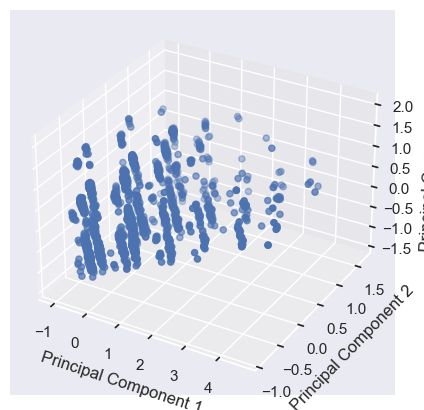

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['PC1'], data['PC2'], data['PC3'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# CLUSTERING

We will do clustering on the dataset. Clustering is done basically to divide the dataset into groups based on their similarities in characteristics and features.

Firstly we will use Elbow method to determine the possible number of clusters required for clustering, then we will use Kmeans clustering technique to create the clusters.

# Elbow Method

To successfully implement the K-means algorithm, we need to identify the number of clusters we want to create using the K-means, and for this we use elbow method.

The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow graph shows WCSS values(on the y-axis) corresponding to the different values of K(on the x-axis). When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this point the Elbow point. Beyond the Elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.

In [150]:
from sklearn.cluster import KMeans

Text(0.5, 0.98, 'Elbow graph')

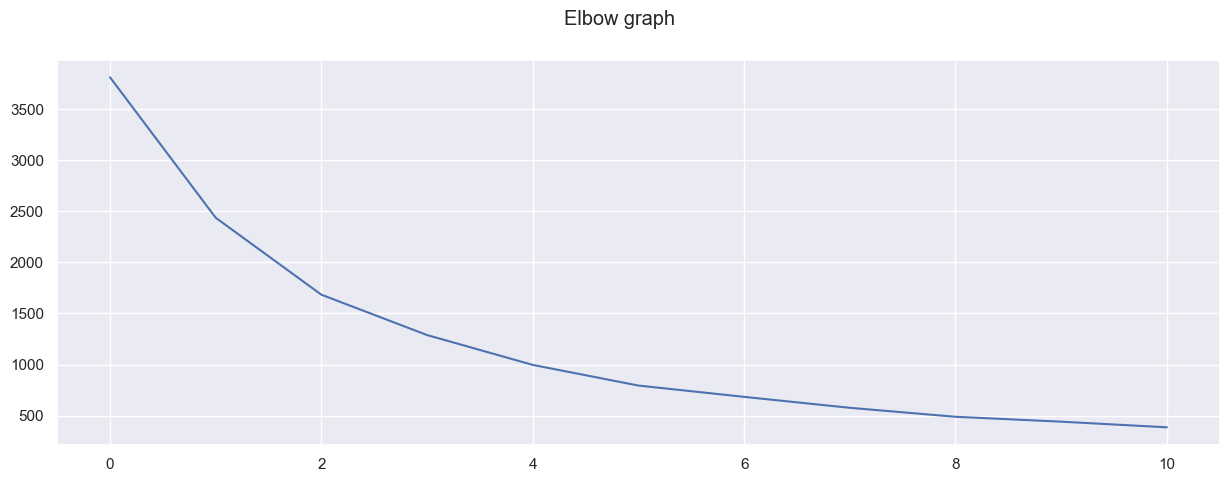

In [151]:
wcss=[]

for i in range(1,12):
    model=KMeans(n_clusters=i).fit(data)
    wcss.append(model.inertia_)
    
plt.plot(wcss)
plt.suptitle('Elbow graph')

# Silhoutte score

The Silhouette score is a very useful method to find the number of K when the Elbow method doesn't show the Elbow point.Silhoutte score is used to check the accuracy of kMean clustering for different K values.

In [152]:
from sklearn.metrics import silhouette_score
for i in [2,3,4]:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
    model=kmean.fit_predict(data)
    score=silhouette_score(data,kmean.labels_,metric='euclidean')
    print(f"accuracy after creating {i} clusters: ",score)

accuracy after creating 2 clusters:  0.4417056980913282
accuracy after creating 3 clusters:  0.3706975571417364
accuracy after creating 4 clusters:  0.3866278563438169


# As K=2 is very small for cluster divide, we check for K=3,4 number of clusters as their accuracy are almost close

In [153]:
model3=KMeans(n_clusters=3,init='k-means++',random_state=0).fit_predict(data)

In [154]:
model3

array([0, 0, 0, ..., 0, 1, 1])

In [155]:
count3 = pd.Series(model3)

In [156]:
count3.value_counts()

0    998
1    968
2    237
dtype: int64

In [157]:
model4=KMeans(n_clusters=4,init='k-means++',random_state=0).fit_predict(data)

In [158]:
count4 = pd.Series(model4)

In [159]:
count4.value_counts()

1    933
3    574
0    462
2    234
dtype: int64

## As K=3 we see that difference of number of datasets in each cluster is more (998-237=761) compared to K=4 (933-234=699), we go with K=4 number of clusters and also the size fluctuation is more


In [160]:
model4

array([1, 0, 1, ..., 1, 1, 3])

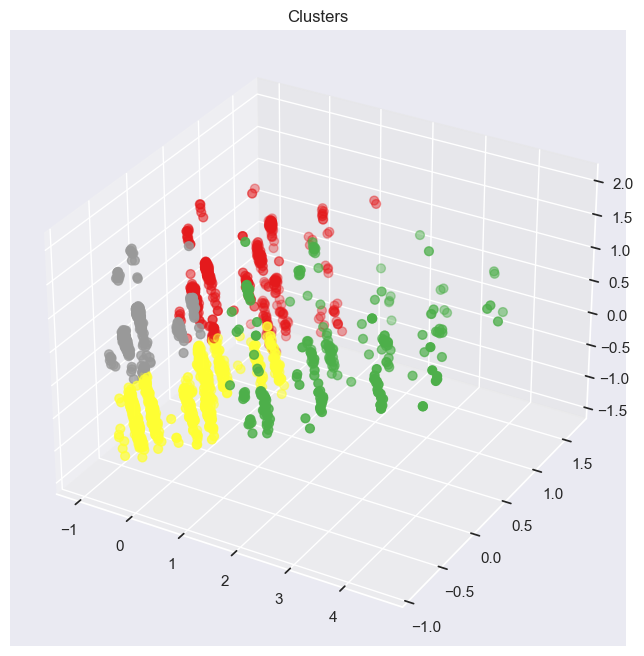

In [161]:
x = data['PC1']
y = data['PC2']
z = data['PC3']
data['Clusters'] = model4
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

# We use inverse transform to get back original values of certain features

In [162]:
cust_data[num_features] = scaler.inverse_transform(cust_data[num_features])

In [163]:
cust_data.head()

Income  Kidhome  Teenhome  Recency  Wines  Fruits   Meat   Fish  Sweets  \
0  58138.0        0         0     58.0  635.0    88.0  546.0  172.0    88.0   
1  46344.0        1         1     38.0   11.0     1.0    6.0    2.0     1.0   
2  71613.0        0         0     26.0  426.0    49.0  127.0  111.0    21.0   
3  26646.0        1         0     26.0   11.0     4.0   20.0   10.0     3.0   
4  58293.0        1         0     94.0  173.0    43.0  118.0   46.0    27.0   

   Gold  NumWebVisitsMonth  Cust_Age   spent  Avg_Purchase  Deal_Share  \
0  88.0                7.0      66.0  1617.0     64.680000    0.120000   
1   6.0                5.0      69.0    27.0      4.500000    0.333333   
2  42.0                4.0      58.0   776.0     36.952381    0.047619   
3   5.0                6.0      39.0    53.0      6.625000    0.250000   
4  15.0                5.0      42.0   422.0     22.210526    0.263158   

   Web_Share  Catalog_Share  Store_Share  Num_Accepted_Cmp  education  \
0   0.320000       0.400000     0.160000                 1          0   
1   0.166667       0.166667     0.333333                 0          0   
2   0.380952       0.095238     0.476190                 0          0   
3   0.250000       0.000000     0.500000                 0          0   
4   0.263158       0.157895     0.315789                 0          1   

   married status  
0               0  
1               0  
2               1  
3               1  
4               1

In [164]:
cust_data['cluster_id']=model4
pd.set_option('display.max_columns', None)
cust_data.head()

Income  Kidhome  Teenhome  Recency  Wines  Fruits   Meat   Fish  Sweets  \
0  58138.0        0         0     58.0  635.0    88.0  546.0  172.0    88.0   
1  46344.0        1         1     38.0   11.0     1.0    6.0    2.0     1.0   
2  71613.0        0         0     26.0  426.0    49.0  127.0  111.0    21.0   
3  26646.0        1         0     26.0   11.0     4.0   20.0   10.0     3.0   
4  58293.0        1         0     94.0  173.0    43.0  118.0   46.0    27.0   

   Gold  NumWebVisitsMonth  Cust_Age   spent  Avg_Purchase  Deal_Share  \
0  88.0                7.0      66.0  1617.0     64.680000    0.120000   
1   6.0                5.0      69.0    27.0      4.500000    0.333333   
2  42.0                4.0      58.0   776.0     36.952381    0.047619   
3   5.0                6.0      39.0    53.0      6.625000    0.250000   
4  15.0                5.0      42.0   422.0     22.210526    0.263158   

   Web_Share  Catalog_Share  Store_Share  Num_Accepted_Cmp  education  \
0   0.320000       0.400000     0.160000                 1          0   
1   0.166667       0.166667     0.333333                 0          0   
2   0.380952       0.095238     0.476190                 0          0   
3   0.250000       0.000000     0.500000                 0          0   
4   0.263158       0.157895     0.315789                 0          1   

   married status  cluster_id  
0               0           1  
1               0           0  
2               1           1  
3               1           0  
4               1           3

# Grouping the dataset based on cluster_id calculated on mean

In [165]:
cust_data.groupby(cust_data['cluster_id']).agg('mean')

Income   Kidhome  Teenhome    Recency       Wines  \
cluster_id                                                            
0           36543.255411  0.997835  0.435065  50.318182   76.043290   
1           61779.680600  0.006431  0.631297  50.612004  430.051447   
2           69787.833333  0.192308  0.282051  42.094017  713.512821   
3           40007.973868  0.804878  0.454704  48.207317  125.012195   

               Fruits        Meat       Fish     Sweets       Gold  \
cluster_id                                                           
0            8.534632   47.562771  11.861472   8.770563  20.348485   
1           39.361200  242.801715  55.616292  39.493033  60.318328   
2           42.170940  343.619658  61.076923  46.602564  67.628205   
3           13.383275   62.013937  20.191638  13.961672  27.249129   

            NumWebVisitsMonth   Cust_Age        spent  Avg_Purchase  \
cluster_id                                                            
0                    6.675325  49.493506   173.121212     12.497798   
1                    4.304394  58.004287   867.642015     44.585908   
2                    4.465812  53.269231  1274.611111     64.008466   
3                    6.263066  51.783972   261.811847     16.572076   

            Deal_Share  Web_Share  Catalog_Share  Store_Share  \
cluster_id                                                      
0             0.268667   0.254814       0.057480     0.419039   
1             0.118022   0.274812       0.195233     0.411933   
2             0.108050   0.275797       0.253494     0.362659   
3             0.240978   0.262906       0.076861     0.419255   

            Num_Accepted_Cmp  education  married status  
cluster_id                                               
0                   0.123377   0.000000        0.664502  
1                   0.235798   0.425509        0.644159  
2                   2.653846   0.576923        0.572650  
3                   0.165505   1.414634        0.662021

# Visualization based on clusters

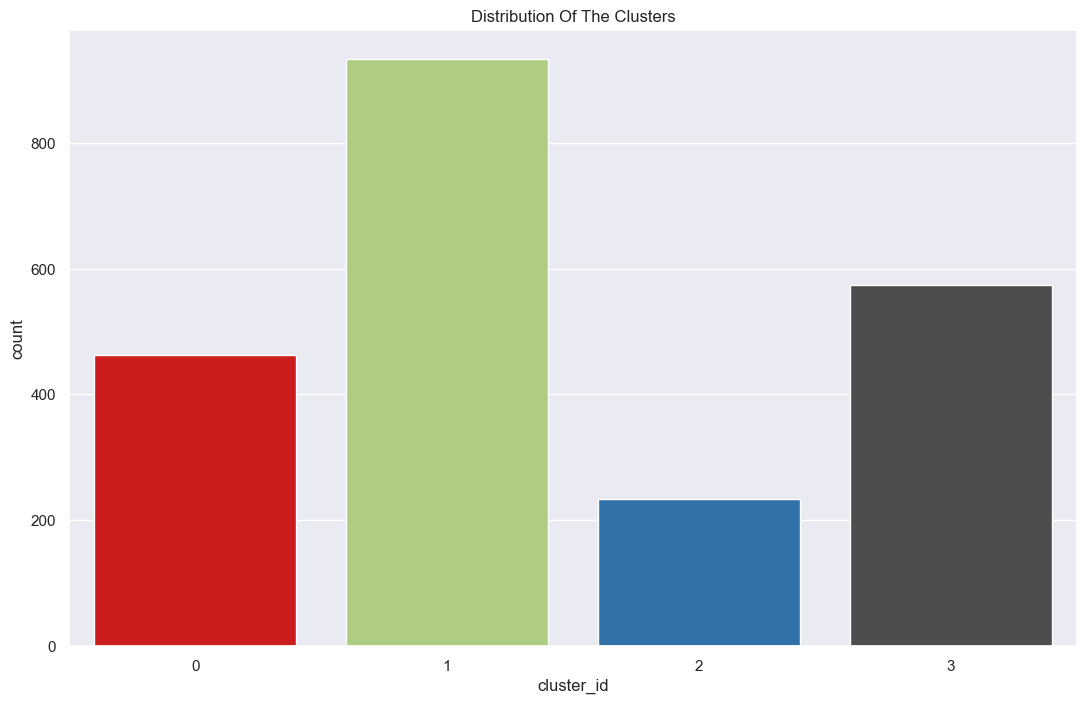

In [166]:
pal = ['#e80000','#b1d877', '#1e73be','#4d4d4d']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=cust_data['cluster_id'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

cluster 0 has average number of people

cluster 1 has highest number of people

cluster 2 has lowest number of people

cluster 3 has average number of people  

# Income and Spending

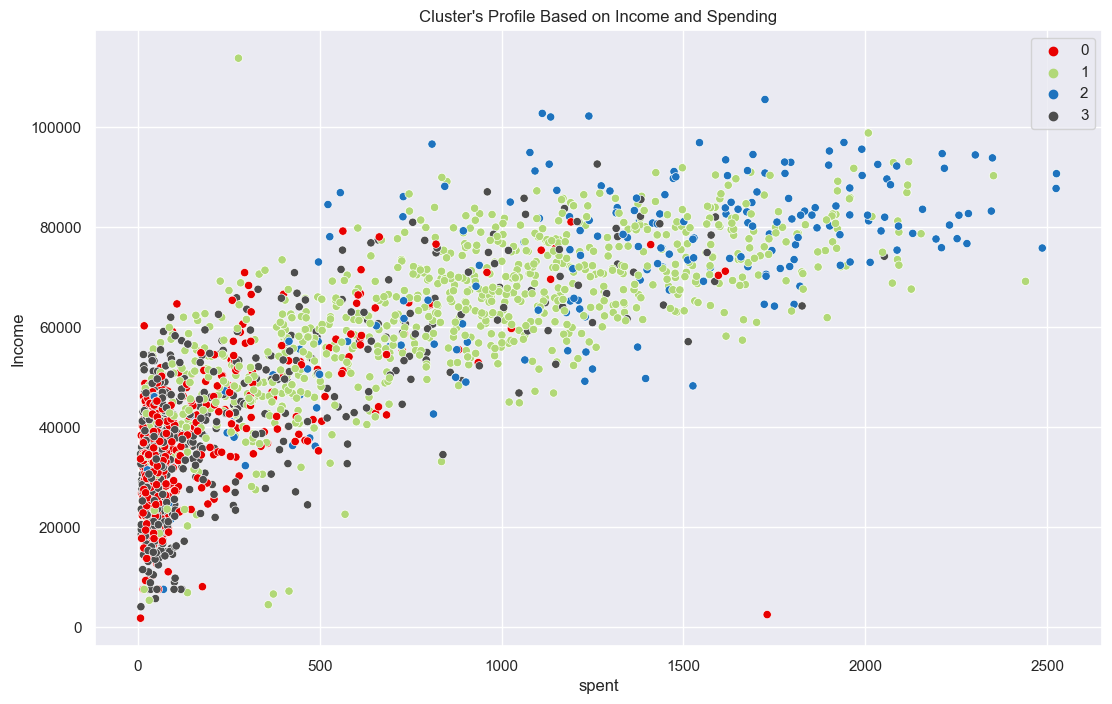

In [167]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=cust_data, x=cust_data['spent'], y=cust_data['Income'], hue=cust_data['cluster_id'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

cluster 0 is lowest spending and low to average income

cluster 1 is averge spending and average to high income

cluster 2 is highest spending and high income

cluster 3 is low spending and low to average income

# Number of Kids

<Axes: xlabel='Kidhome', ylabel='spent'>

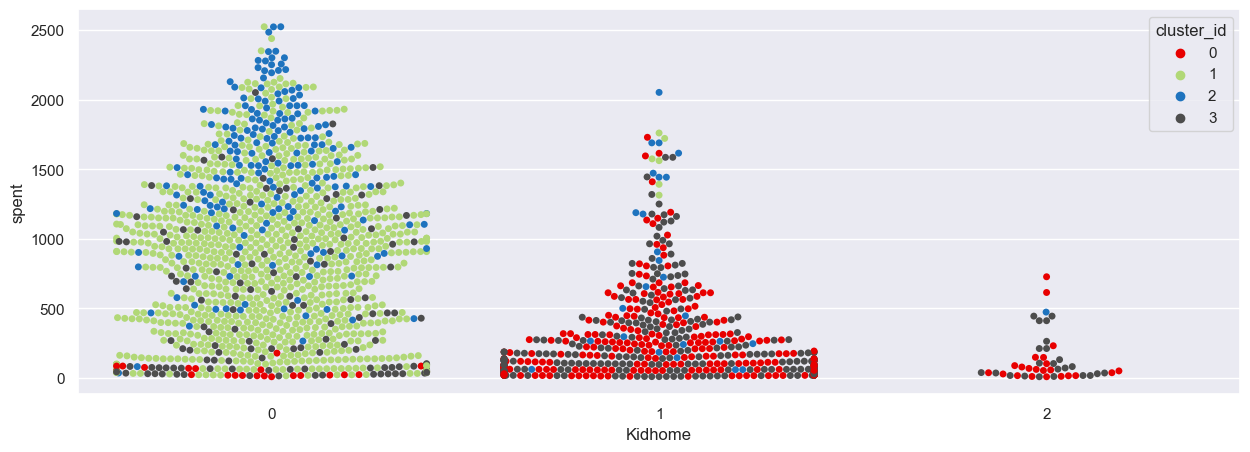

In [168]:
sns.swarmplot(x='Kidhome', y='spent', data=cust_data, hue='cluster_id', palette=pal)

cluster 0 has one kid

cluster 1 has no kids

cluster 2 has atmost one kid

cluster 3 has atmost two kids

# Number of Teens

<Axes: xlabel='Teenhome', ylabel='spent'>

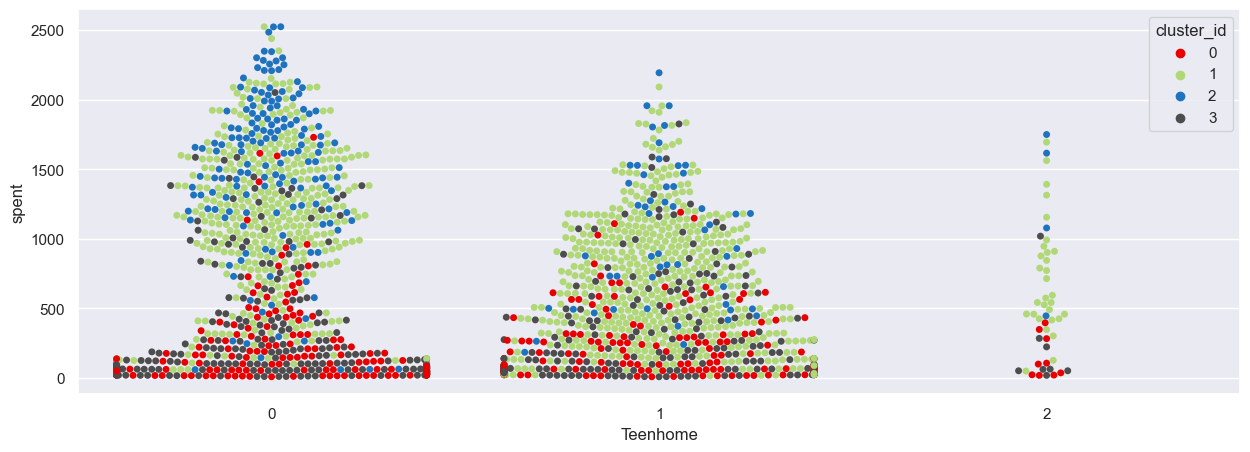

In [169]:
sns.swarmplot(x='Teenhome', y='spent', data=cust_data, hue='cluster_id', palette=pal)

cluster 0 has atmost one teen

cluster 1 has atmost two teen

cluster 2 has atmost one teen

cluster 3 has atmost one teen

# Educational qualification

<Axes: xlabel='education', ylabel='spent'>

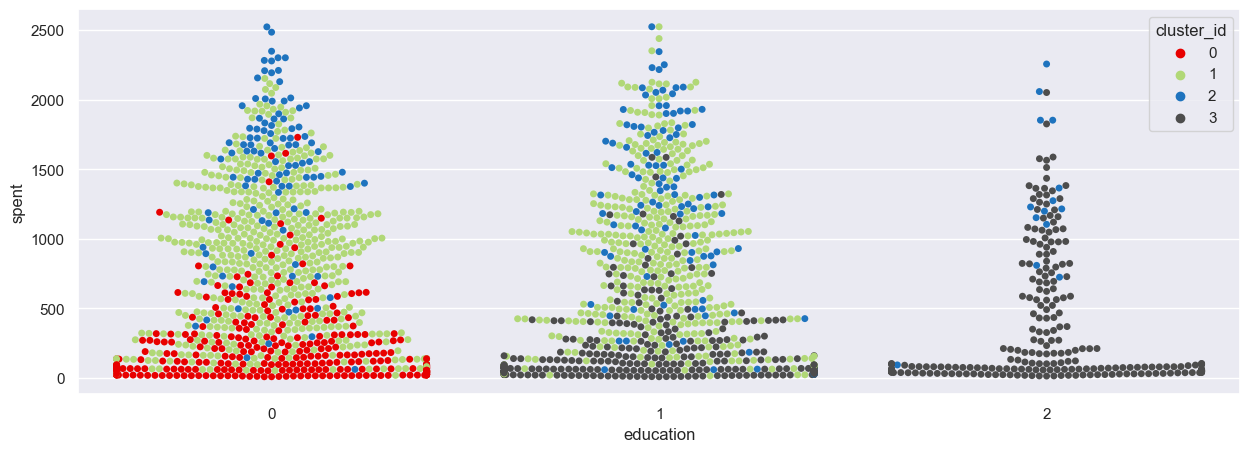

In [170]:
sns.swarmplot(x='education', y='spent', data=cust_data, hue='cluster_id', palette=pal)

cluster 0 has graduate people

cluster 1 has both graduate and postgraduate people

cluster 2 has all types 

cluster 3 has undergraduate and postgraduate people

# Married Status

<Axes: xlabel='married status', ylabel='spent'>

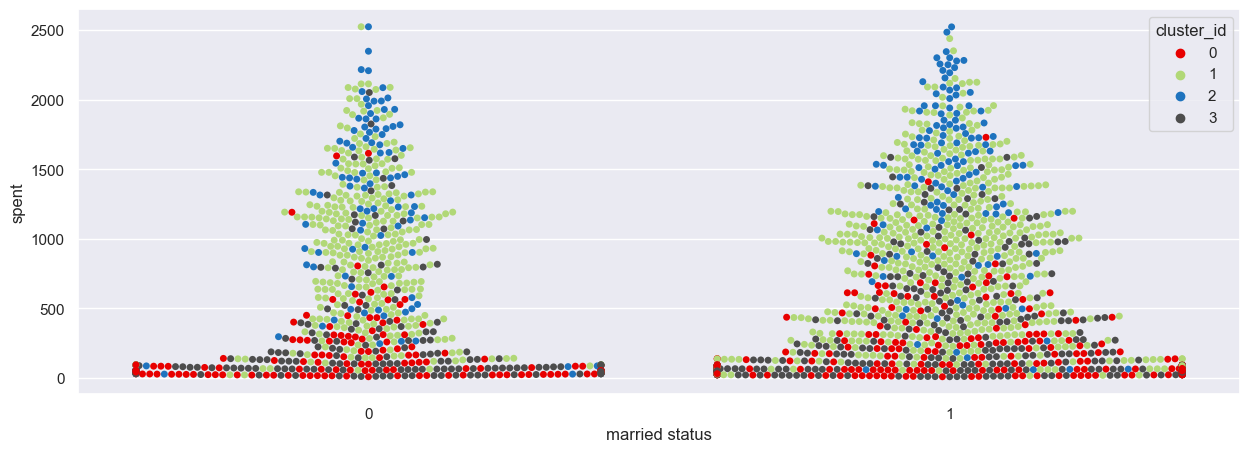

In [171]:
sns.swarmplot(x='married status', y='spent', data=cust_data, hue='cluster_id', palette=pal)

All clusters have both single and married people

# Customer age 

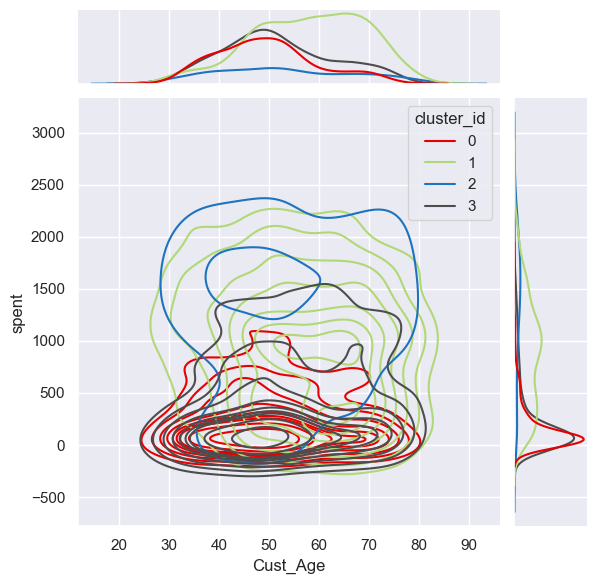

In [172]:
sns.jointplot(x='Cust_Age', y='spent', data=cust_data, hue='cluster_id', kind='kde', palette=pal);

cluster 0 has mostly middle age people spending less

cluster 1 has mostly older people and average spending

cluster 2 has both middle and old age people spending more 

cluster 3 has both middle and old age people spending less 

# Deal share 

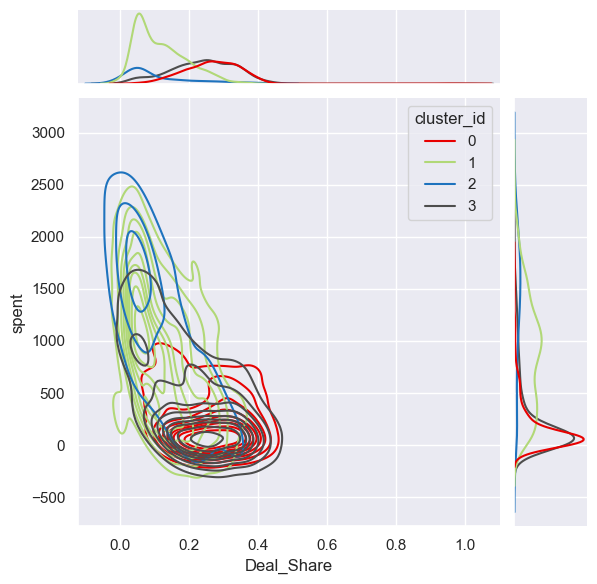

In [173]:
sns.jointplot(x='Deal_Share', y='spent', data=cust_data, hue='cluster_id', kind='kde', palette=pal);

cluster 0 has low deal share

cluster 1 has high deal share 

cluster 2 has high deal share 

cluster 3 has low deal share

# Web Share

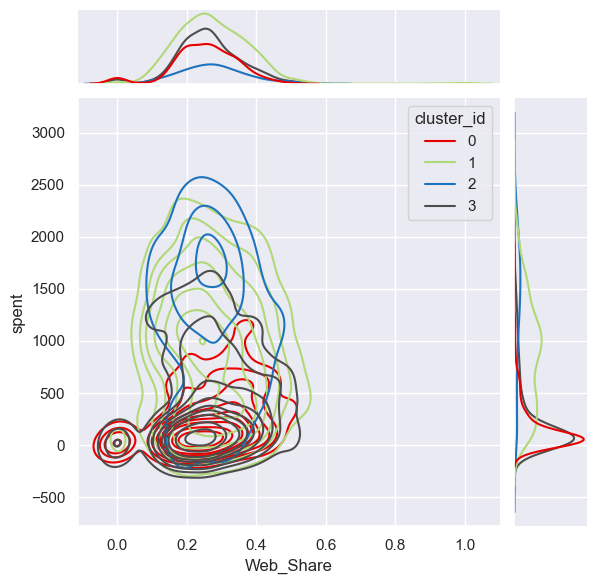

In [174]:
sns.jointplot(x='Web_Share', y='spent', data=cust_data, hue='cluster_id', kind='kde', palette=pal);

All clusters have similar web share 

# Catalog Share

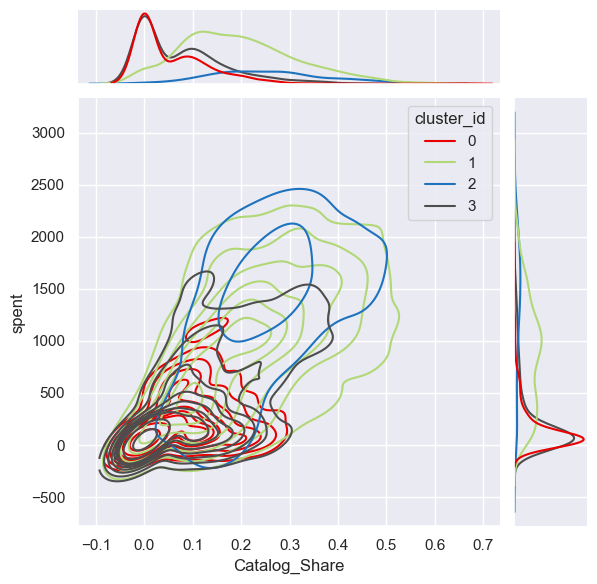

In [175]:
sns.jointplot(x='Catalog_Share', y='spent', data=cust_data, hue='cluster_id', kind='kde', palette=pal);

cluster 0 has low catalog share 

cluster 1 has high catalog share 

cluster 2 has high catalog share 

cluster 3 has low catalog share

# Store Share

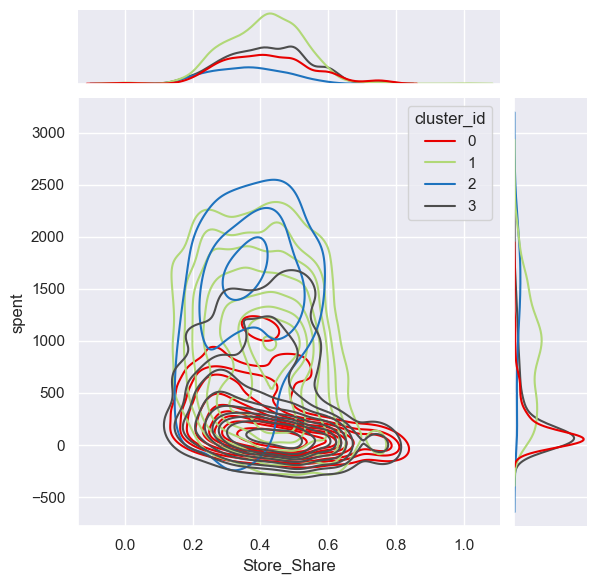

In [176]:
sns.jointplot(x='Store_Share', y='spent', data=cust_data, hue='cluster_id', kind='kde', palette=pal);

All clusters have similar store share

# Number of Accepted Campaigns

<Axes: xlabel='Num_Accepted_Cmp', ylabel='spent'>

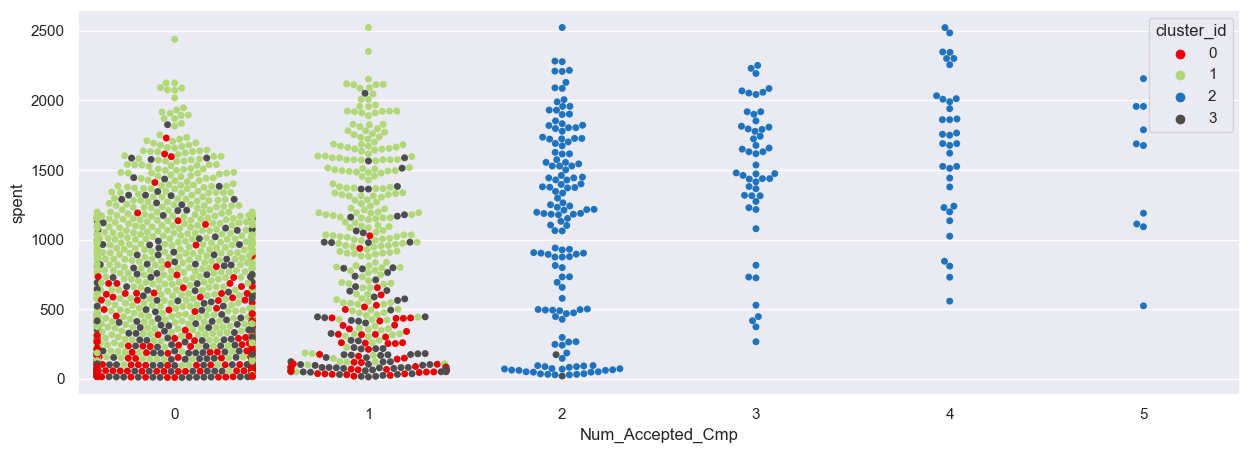

In [177]:
sns.swarmplot(x='Num_Accepted_Cmp', y='spent', data=cust_data, hue='cluster_id', palette=pal)

cluster 0 has atmost accepted one campaign offer

cluster 1 has atmost accepted one campaign offer

cluster 2 has atleast accepted two campaign offer

cluster 3 has atmost accepted one campaign offer

# Model Building

We use different models for model building such as Decision tree, Logistic regression, Naive Bayes, SVM and check their accuracy and finalize a single model.

# Logistic Regression

Logistic regression is one of the most popular supervised machine learning technique. It is used for solving classification problems.

First we train the dataset using the training set. For providing training or fitting the model to the training set, we will import the LogisticRegression class of the sklearn library.

Our model is well trained on the training set, so we will now predict the result by using test set data.

Now we will create the confusion matrix here to check the accuracy of the classification.

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cust_st_scaled = cust_data 
cust_st_scaled[num_features] = scaler.fit_transform(cust_st_scaled[num_features])
cust_st_scaled

Income  Kidhome  Teenhome   Recency     Wines    Fruits      Meat  \
0     0.313176        0         0  0.310419  0.973665  1.547618  1.747373   
1    -0.257455        1         1 -0.380865 -0.875520 -0.639073 -0.732220   
2     0.965140        0         0 -0.795635  0.354306  0.567378 -0.176608   
3    -1.210507        1         0 -0.795635 -0.875520 -0.563670 -0.667935   
4     0.320676        1         0  1.554729 -0.395443  0.416571 -0.217934   
...        ...      ...       ...       ...       ...       ...       ...   
2235  0.462439        0         1 -0.104351  1.192959  0.416571  0.075944   
2236  0.597476        2         1  0.241290  0.295038 -0.664207 -0.622016   
2237  0.257197        0         0  1.451036  1.782684  0.542243  0.236658   
2238  0.850568        0         1 -1.417790  0.360233  0.089824  0.222882   
2239  0.058245        1         1 -0.311737 -0.659189 -0.588804 -0.479669   

          Fish    Sweets      Gold  NumWebVisitsMonth  Cust_Age     spent  \
0     2.447940  1.479323  0.848683           0.696234  1.016774  1.678416   
1    -0.652803 -0.635835 -0.736420          -0.137128  1.273012 -0.964805   
2     1.335321 -0.149592 -0.040521          -0.553809  0.333471  0.280335   
3    -0.506885 -0.587211 -0.755750           0.279553 -1.289374 -0.921583   
4     0.149742 -0.003719 -0.562445          -0.137128 -1.033135 -0.308156   
...        ...       ...       ...                ...       ...       ...   
2235  0.076784  2.208688  3.922235          -0.137128  0.162645  1.219593   
2236 -0.689282 -0.660148 -0.697759           0.696234  1.956315 -0.271583   
2237 -0.105613 -0.368402 -0.388471           0.279553 -1.033135  1.053352   
2238  0.769891  0.069217  0.326759          -0.970490  1.102187  0.391716   
2239 -0.652803 -0.635835 -0.446462           0.696234  1.273012 -0.723757   

      Avg_Purchase  Deal_Share  Web_Share  Catalog_Share  Store_Share  \
0         1.123081   -0.546937   0.535375       2.064624    -2.131431   
1        -0.985094    1.378731  -1.031849       0.199631    -0.654214   
2         0.151750   -1.200289   1.158370      -0.371285     0.563272   
3        -0.910653    0.626517  -0.180097      -1.132507     0.766187   
4        -0.364674    0.745287  -0.045610       0.129518    -0.803730   
...            ...         ...        ...            ...          ...   
2235      1.467086   -0.627174   2.375159       0.199631    -1.601148   
2236     -0.435742    1.241965   0.981383      -0.405886    -1.558106   
2237      1.145353   -1.155043  -1.659456       0.129518     2.336103   
2238      0.141234   -0.845207  -0.068999       0.605064     0.210378   
2239     -0.594974    0.831666   0.052199      -0.405886    -0.395960   

      Num_Accepted_Cmp  education  married status  cluster_id  
0                    1          0               0           1  
1                    0          0               0           0  
2                    0          0               1           1  
3                    0          0               1           0  
4                    0          1               1           3  
...                ...        ...             ...         ...  
2235                 0          0               1           1  
2236                 1          1               1           3  
2237                 1          0               0           1  
2238                 0          1               1           1  
2239                 1          1               1           3  

[2203 rows x 22 columns]

In [180]:
x=cust_st_scaled.iloc[:,0:21]
y=cust_st_scaled.iloc[:,21]

In [181]:
y

0       1
1       0
2       1
3       0
4       3
       ..
2235    1
2236    3
2237    1
2238    1
2239    3
Name: cluster_id, Length: 2203, dtype: int32

In [182]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [183]:
model=LogisticRegression().fit(X_train,y_train)

In [184]:
test_pred=model.predict(X_test)
test_pred

array([3, 3, 1, 3, 0, 1, 0, 0, 3, 1, 3, 1, 2, 1, 1, 0, 3, 0, 3, 3, 0, 3,
       1, 3, 2, 0, 3, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 0, 3, 1, 0, 2, 1,
       0, 1, 3, 1, 1, 3, 1, 2, 0, 1, 3, 1, 3, 3, 1, 1, 1, 1, 0, 3, 3, 3,
       1, 3, 0, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 2, 1, 2, 0,
       1, 3, 0, 0, 1, 1, 2, 3, 1, 0, 2, 3, 3, 1, 1, 0, 2, 0, 0, 1, 3, 1,
       3, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 1, 2, 1,
       0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 0, 2, 0, 1, 1, 3, 2, 3, 0, 1, 0,
       3, 1, 3, 3, 1, 0, 0, 0, 2, 1, 3, 1, 1, 2, 1, 3, 3, 1, 2, 3, 2, 1,
       1, 3, 3, 1, 0, 2, 1, 1, 0, 3, 3, 1, 2, 1, 0, 3, 2, 1, 3, 0, 2, 1,
       1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2,
       3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 2, 1, 3, 0, 1, 1, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 0, 3, 0, 1, 3,
       1, 1, 2, 1, 1, 2, 0, 3, 1, 1, 1, 2, 0, 1, 3, 2, 3, 1, 1, 2, 2, 0,
       2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 0, 1, 1, 3, 3,

In [185]:
newdf=pd.DataFrame({'actual':y_test,'prediction':test_pred})
newdf

actual  prediction
1287       3           3
213        3           3
350        1           1
1393       3           3
219        0           0
...      ...         ...
227        1           1
1453       3           3
1676       0           0
1510       1           1
1008       0           0

[661 rows x 2 columns]

In [186]:
lr_accu=accuracy_score(y_test,test_pred)
lr_accu

0.983358547655068

In [187]:
confusion_matrix(y_test,test_pred)

array([[130,   4,   0,   0],
       [  1, 266,   0,   1],
       [  0,   0,  69,   1],
       [  0,   4,   0, 185]], dtype=int64)

# ------------------------------------------------------------------------------------

# Naive Bayes

Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

Types of Naive Bayes Model:

Gaussian: The Gaussian model assumes that features follow a normal distribution. 

Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed.

For this also we do the same thing of training the dataset based on Naive Bayes in sklearn and then test the values and check their accuracy.

In [188]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [189]:
x=cust_data.iloc[:,0:21]
y=cust_data.iloc[:,21]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [191]:
x_train = norm_func(X_train)
x_test =  norm_func(X_test)

# Multinominal Naive Bayes

In [192]:
from sklearn.naive_bayes import MultinomialNB as MB

In [193]:
model=MB()
train_pred_multi=model.fit(x_train,y_train).predict(x_train)
test_pred_multi=model.fit(x_train,y_train).predict(x_test)

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred_multi)

array([[129,   4,   1,   0],
       [ 13, 243,   0,  12],
       [  4,  38,  18,  10],
       [  0,  23,   0, 166]], dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score
mnb_accu=accuracy_score(y_test,test_pred_multi)
mnb_accu

0.8411497730711044

# Gaussian Naive Bayes

In [196]:
from sklearn.naive_bayes import GaussianNB as GB
GB_model=GB()
train_pred_gau=GB_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=GB_model.fit(x_train,y_train).predict(x_test)

In [197]:
confusion_matrix(y_test, test_pred_gau)

array([[127,   0,   7,   0],
       [ 40, 150,  44,  34],
       [  5,   0,  56,   9],
       [  0,  14,   6, 169]], dtype=int64)

In [198]:
gnb_accu=accuracy_score(y_test,test_pred_gau)
gnb_accu

0.7594553706505295

# In Naive Bayes Multinominal Naive Bayes has more accuracy than Gaussian 

# -------------------------------------------------------------------------------------------

# Decision Tree


Decision Tree is a Supervised learning technique and is preferred for solving Classification problems. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

Two types of criteria for decision tree 

Entropy:-Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.

Gini:- Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.

For this also we do the same thing of training the dataset based on Decision tree classifier in sklearn and then test the values and check their accuracy.

In [199]:
from sklearn.tree import  DecisionTreeClassifier

In [200]:
x=cust_data.iloc[:,0:21]
y=cust_data.iloc[:,21]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Entropy criteria

In [202]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

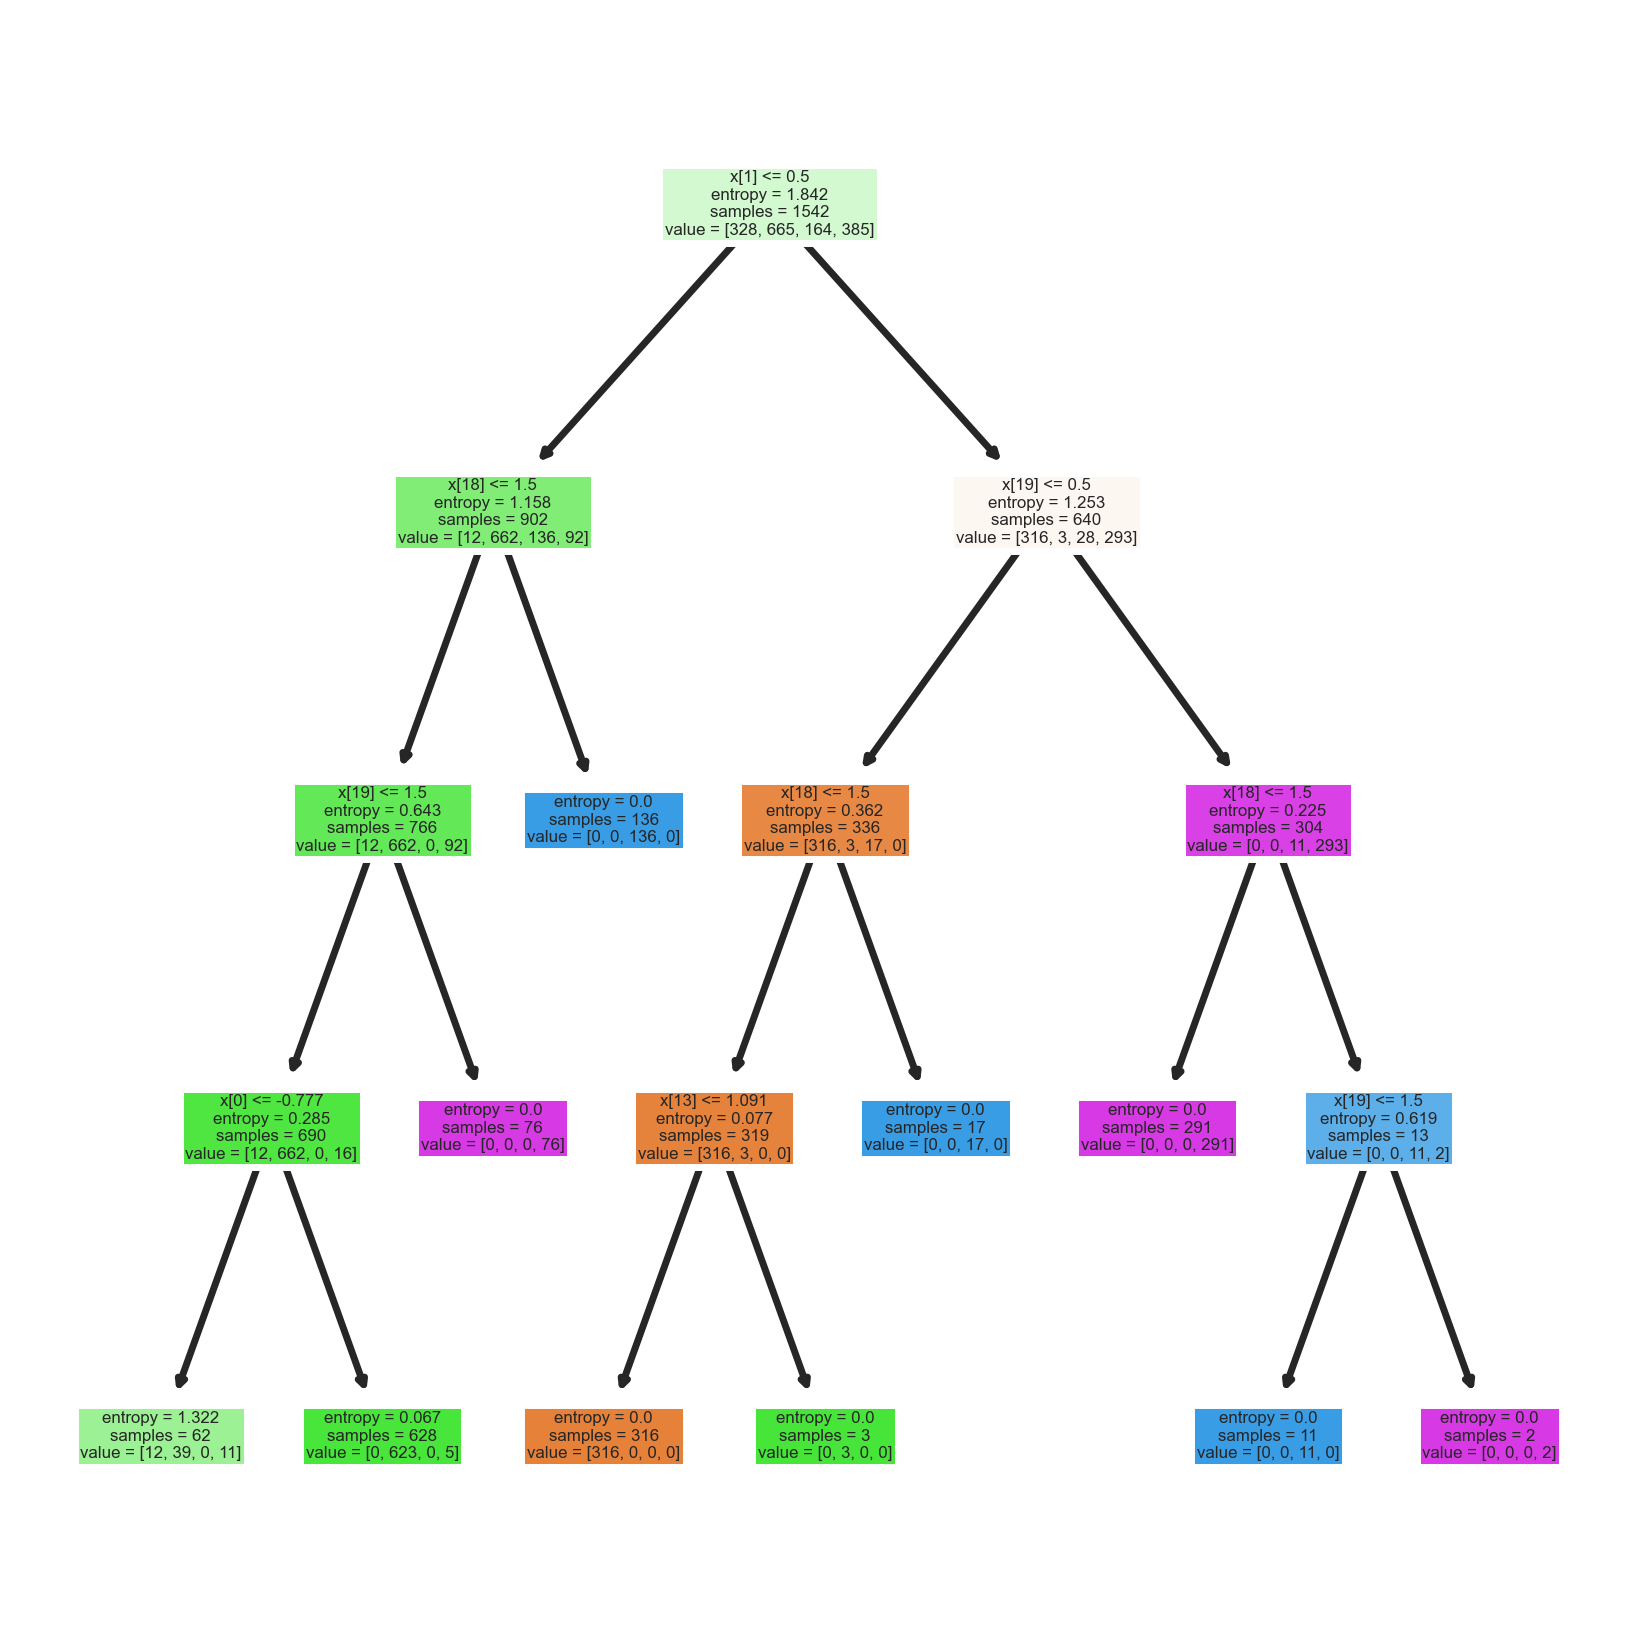

In [203]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
from sklearn import tree
tree.plot_tree(model,filled = True);

In [204]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

1    284
3    186
0    122
2     69
dtype: int64

In [205]:
y_test.value_counts()

1    268
3    189
0    134
2     70
Name: cluster_id, dtype: int64

In [206]:
pd.crosstab(y_test,preds)

col_0         0    1   2    3
cluster_id                   
0           121   13   0    0
1             1  266   0    1
2             0    0  69    1
3             0    5   0  184

In [207]:
dt1_accu=accuracy_score(y_test,preds)
dt1_accu

0.9682299546142209

# Gini Criteria

In [208]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [209]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [210]:
pred=model_gini.predict(X_test)
dt2_accu=accuracy_score(y_test,pred)
dt2_accu

0.9682299546142209

In [211]:
pd.crosstab(y_test,pred)

col_0         0    1   2    3
cluster_id                   
0           121   13   0    0
1             1  266   0    1
2             0    0  69    1
3             0    5   0  184

# Both the accuracy are same so lets consider entropy criteria for decision tree

# -------------------------------------------------------------------------------------------------------

# SVM 

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

Here we first check the best hyperparameters for the model like the kernel, C and gamma.

And then we build the model based on best hyperparameter on training dataset based on SVC classifier in sklearn and then test the dataset and check the accuracy

In [212]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [213]:
x=cust_data.iloc[:,0:21]
y=cust_data.iloc[:,21]

In [214]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [215]:
x_train = norm_func(X_train)
x_test =  norm_func(X_test)

In [216]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf','poly'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.0001, gamma=0.5, kernel=rbf...........................
[CV 1/10; 1/10] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.432 total time=   0.0s
[CV 2/10; 1/10] START C=0.0001, gamma=0.5, kernel=rbf...........................
[CV 2/10; 1/10] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.432 total time=   0.0s
[CV 3/10; 1/10] START C=0.0001, gamma=0.5, kernel=rbf...........................
[CV 3/10; 1/10] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.435 total time=   0.0s
[CV 4/10; 1/10] START C=0.0001, gamma=0.5, kernel=rbf...........................
[CV 4/10; 1/10] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.435 total time=   0.0s
[CV 5/10; 1/10] START C=0.0001, gamma=0.5, kernel=rbf...........................
[CV 5/10; 1/10] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.435 total time=   0.0s
[CV 6/10; 1/10] START C=0.0001, gamma=0.5, kernel=rbf...........................
[CV 6/10; 1/10] END C=0.00

[CV 5/10; 6/10] END C=0.1, gamma=0.5, kernel=linear;, score=0.942 total time=   0.0s
[CV 6/10; 6/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 6/10; 6/10] END C=0.1, gamma=0.5, kernel=linear;, score=0.903 total time=   0.0s
[CV 7/10; 6/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 7/10; 6/10] END C=0.1, gamma=0.5, kernel=linear;, score=0.948 total time=   0.0s
[CV 8/10; 6/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 8/10; 6/10] END C=0.1, gamma=0.5, kernel=linear;, score=0.948 total time=   0.0s
[CV 9/10; 6/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 9/10; 6/10] END C=0.1, gamma=0.5, kernel=linear;, score=0.942 total time=   0.0s
[CV 10/10; 6/10] START C=0.1, gamma=0.5, kernel=linear..........................
[CV 10/10; 6/10] END C=0.1, gamma=0.5, kernel=linear;, score=0.922 total time=   0.0s
[CV 1/10; 7/10] START C=0.1, gamma=0.01, kernel=poly............................
[CV

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf', 'poly']}],
                   verbose=300)

In [217]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'poly', 'gamma': 0.5, 'C': 10}, 0.9818391286133222)

In [218]:
clf = SVC(kernel='linear', C=10, gamma = 0.01)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
svm_accu = accuracy_score(y_test, y_pred) 
print("Accuracy =", svm_accu)
confusion_matrix(y_test, y_pred)

Accuracy = 0.9863842662632375


array([[134,   0,   0,   0],
       [  3, 265,   0,   0],
       [  0,   0,  70,   0],
       [  0,   6,   0, 183]], dtype=int64)

# We selected kernel as linear , C=10 and gamma=0.01 as it gives maximum accuracy

# --------------------------------------------------------------------------------------------------------

# Random Forest

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

Here first we use KFold to split the dataset and then use Random forest classifier from sklearn and then check the average of the values from KFold and check the accuracy.

In [219]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [220]:
x=cust_data.iloc[:,0:21]
y=cust_data.iloc[:,21]

In [221]:
kfold = KFold(n_splits=10) 
model = RandomForestClassifier(n_estimators=100, max_features=4)
results = cross_val_score(model, x, y, cv=kfold)
RF_accu=results.mean()
RF_accu

0.991834635952283

# -----------------------------------------------------------------------------------------------------

# KNN

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In this we first check the best n_neighbors value by using GridSearchCV in sklearn.

We then take the best n_neighbors and train the dataset using KNeighbors Classifier and then test the dataset and calculate accuracy.

In [222]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [223]:
x=cust_data.iloc[:,0:21]
y=cust_data.iloc[:,21]

In [224]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [225]:
print(grid.best_score_)
print(grid.best_params_)

0.8669995877138735
{'n_neighbors': 5}


In [226]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [227]:
model=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [228]:
pred=model.predict(X_test)
knn_accu=accuracy_score(y_test,pred)
knn_accu

0.8577912254160364

# Final accuracy

In [229]:
data = {"MODEL":pd.Series(["Logistic Regression","Naive Bayes","Decision tree","SVM","Random Forest","KNN"]),"Accuracy_Values":pd.Series([lr_accu,mnb_accu,dt1_accu,svm_accu,RF_accu,knn_accu])}
table_accu=pd.DataFrame(data)
table_accu.sort_values(['Accuracy_Values'])

MODEL  Accuracy_Values
1          Naive Bayes         0.841150
5                  KNN         0.857791
2        Decision tree         0.968230
0  Logistic Regression         0.983359
3                  SVM         0.986384
4        Random Forest         0.991835

# We see that Naive Bayes,KNN has low accuracy and LR,SVM and RF has high accuracy so overfitting so we select Decision tree as final model

# -------------------------------------------------------------------------------------------------------------

# Final Model

In [230]:
from sklearn.tree import  DecisionTreeClassifier

In [248]:
x=cust_data.iloc[:,[0,1,2,11,18,19,20]]
y=cust_data.iloc[:,21]

In [249]:
final_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
final_model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [254]:
import pickle
pickle_out = open("final_model2.pkl",'wb')
pickle.dump(final_model,pickle_out)
pickle_out.close()

In [252]:
test_pred=final_model.predict(x)
test_pred

array([1, 0, 1, ..., 1, 1, 3])

In [253]:
accu=accuracy_score(y,test_pred)
accu

0.9768497503404449